<a href="https://colab.research.google.com/github/srujaan/DL-with-PyTorch/blob/master/ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from matplotlib import pyplot as plt

In [2]:
# Downloading CIFAR-10

from torchvision import datasets
data_path = '../data-unversioned/p1ch7/'
cifar10 = datasets.CIFAR10(data_path, train=True, download=True)
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True)

# With train=False, this gets us a dataset for the validation data,
# again downloading as necessary

Extracting ../data-unversioned/p1ch7/cifar-10-python.tar.gz to ../data-unversioned/p1ch7/
Files already downloaded and verified


In [3]:
# cifar 10 instance includes it as a base class

type(cifar10).__mro__

(torchvision.datasets.cifar.CIFAR10,
 torchvision.datasets.vision.VisionDataset,
 torch.utils.data.dataset.Dataset,
 typing.Generic,
 object)

In [4]:
len(cifar10)

50000

In [5]:
img, label = cifar10[99]
img, label, cifar10.classes[label]

(<PIL.Image.Image image mode=RGB size=32x32 at 0x7EFD11F99890>,
 1,
 'automobile')

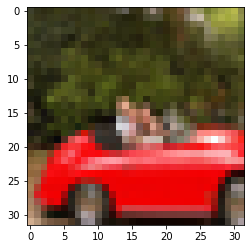

In [6]:
# So, the sample in the data.CIFAR10 dataset is an instance of an RGB PIL image. We
# can plot it right away:

plt.imshow(img)
plt.show()

In [7]:
# Dataset transforms
# Transform the PIL image to pytorch tensor so we use transformation
# We can see the list of available objects as follows:

from torchvision import transforms
dir(transforms)

['CenterCrop',
 'ColorJitter',
 'Compose',
 'ConvertImageDtype',
 'FiveCrop',
 'GaussianBlur',
 'Grayscale',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'PILToTensor',
 'Pad',
 'RandomAffine',
 'RandomApply',
 'RandomChoice',
 'RandomCrop',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomOrder',
 'RandomPerspective',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSizedCrop',
 'RandomVerticalFlip',
 'Resize',
 'Scale',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'functional',
 'functional_pil',
 'functional_tensor',
 'transforms']

In [8]:
# ToTensor, which turns Numpy arrays and PIL images to tensors
# It also takes care to lay out the dimensions of the output tensor as C × H × W

from torchvision import transforms

to_tensor = transforms.ToTensor()
img_t = to_tensor(img)
img_t.shape

torch.Size([3, 32, 32])

In [9]:
# we can pass the transform directly as an argument to dataset.CIFAR10 :

tensor_cifar10 = datasets.CIFAR10(data_path, train=True, download=False, 
                            transform=transforms.ToTensor())

In [10]:
tensor_cifar10

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ../data-unversioned/p1ch7/
    Split: Train
    StandardTransform
Transform: ToTensor()

In [11]:
# At this point, accessing an element of the dataset 
# will return a tensor, rather than a PIL image:
# img_t stands for image transform

img_t, _ = tensor_cifar10[99]
type(img_t)

torch.Tensor

In [12]:
img_t.shape, img_t.dtype

(torch.Size([3, 32, 32]), torch.float32)

In [13]:
img_t.min(), img_t.max()

(tensor(0.), tensor(1.))

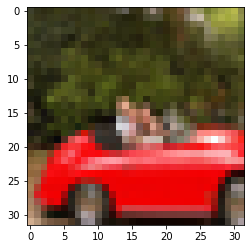

In [14]:
# let’s verify that we’re getting the same image out:
# In[14]:
plt.imshow(img_t.permute(1, 2, 0)) 

# permute changes the order of the axes from
# C x H x W to H x W x C what the Matplotlib expects

plt.show()


In [15]:
# Let’s stack all the tensors returned by the dataset along an extra dimension:

imgs = torch.stack([img_t for img_t, _ in tensor_cifar10], dim=3)
imgs.shape

torch.Size([3, 32, 32, 50000])